# Modeling Walkthrough

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Modeling Steps

1. Build a model based on the [Titanic dataset](https://www.kaggle.com/c/titanic/data) that predicts whether a given person survived or not
2. Evaluate the performance of the model
3. Make changes in an attempt to improve the model
4. Demonstrate whether an improvement was made

## The Data

This dataset has the following columns:

| Variable | Definition | Key |
| -------- | ---------- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## Initial Data Understanding and Preparation

Open up the file, get everything into `X` features and `y` target variables, divided into train and test

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age data is missing for about 1 in 9 rows in our dataset.  For now, let's just exclude it, plus the non-numeric columns, and `PassengerId` which doesn't seem like a real feature, but rather just an artifact of the dataset.

In [5]:
columns_to_use = ["Survived", "Pclass", "SibSp", "Parch", "Fare"]

In [6]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Not a huge class imbalance, but not evenly-sized categories either

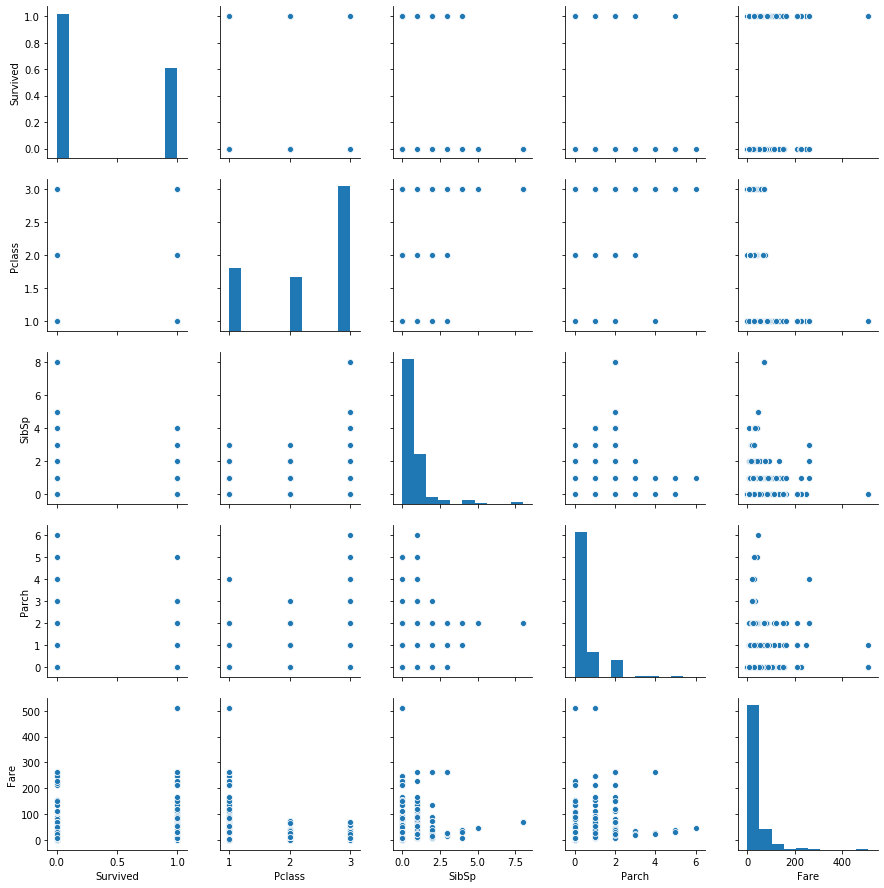

In [7]:
sns.pairplot(df[columns_to_use])

In [8]:
df_to_use = df[columns_to_use]
X = df_to_use.drop("Survived", axis=1)
y = df_to_use["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

## Modeling

Let's start with a completely "dummy" model, that will always choose the majority class.

In [9]:
dummy_model = DummyClassifier(strategy="most_frequent")

Fit the model on our data

In [10]:
dummy_model.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

We should expect all predictions to be the same

In [11]:
# just grabbing the first 50 to save space
dummy_model.predict(X_train)[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Model Evaluation

In [12]:
dummy_model.score(X_train, y_train)

0.6032934131736527

So, the mean accuracy is about 60% if we always guess the majority class

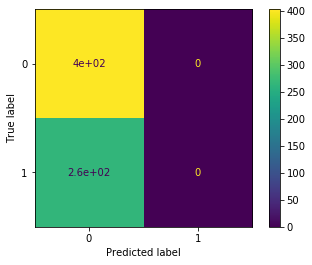

In [13]:
plot_confusion_matrix(dummy_model, X_train, y_train)

A pretty lopsided confusion matrix!

## Modeling, Again

Let's use a logistic regression and compare its performance

In [14]:
logreg_model = LogisticRegression(random_state=2019)

In [15]:
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2019, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Look at the predictions

In [16]:
logreg_model.predict(X_train)[:50]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Mixture of 1s and 0s this time

## Model Evaluation, Again

In [17]:
logreg_model.score(X_train, y_train)

0.7005988023952096

So the mean accuracy is 70% if the model is actually taking in information from the features instead of always guessing the majority class

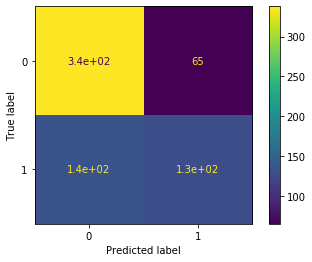

In [18]:
plot_confusion_matrix(logreg_model, X_train, y_train)

In [19]:
confusion_matrix(y_train, logreg_model.predict(X_train))

array([[338,  65],
       [135, 130]])

So, in general we are not labeling many of the "not survived" passengers as "survived", but for "survived" passengers we're getting it right only about half of the time

## Data Understanding and Preparation, Again

Maybe there is some useful information in the features we are not using yet.

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Maybe we could do some parsing to make more sense of this, but that seems complicated

In [22]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

This one is of type "object" but looks potentially one-hot-encode-able

In [23]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

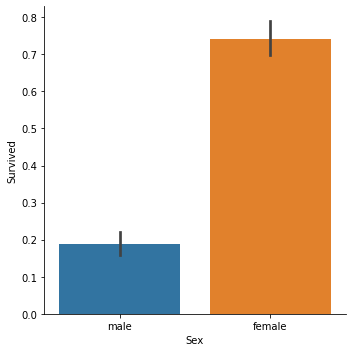

In [24]:
sns.catplot(x="Sex", y="Survived", data=df, kind="bar")

Looks like there is a meaningful difference in survival rates, so let's add it to the model

Only two categories, so we only need a LabelEncoder (no new columns needed, we just need to replace the strings with numbers)

In [25]:
# re-do the train test split to add another feature
columns_to_use.append("Sex")
df_to_use = df[columns_to_use]
X = df_to_use.drop("Survived", axis=1)
y = df_to_use["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

In [26]:
label_encoder = LabelEncoder()

In [27]:
sex_labels = label_encoder.fit_transform(X_train["Sex"])
sex_labels[:50]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0])

In [28]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

So, this is telling us that "female" is encoded as 0, "male" is encoded as 1

In [29]:
X_train["sex_encoded"] = sex_labels
X_train = X_train.drop("Sex", axis=1)

/Users/ehoffman/.conda/envs/prework-labs/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Modeling and Model Evaluation, Again

Let's see how the logistic regression does, now that this new feature has been added

In [30]:
second_logreg_model = LogisticRegression(random_state=2019)

In [31]:
second_logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2019, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
second_logreg_model.score(X_train, y_train)

0.7934131736526946

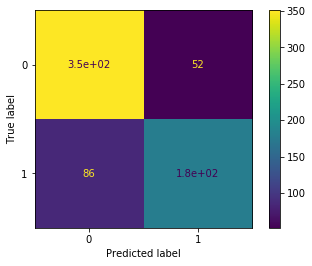

In [33]:
plot_confusion_matrix(second_logreg_model, X_train, y_train)

In [34]:
confusion_matrix(y_train, second_logreg_model.predict(X_train))

array([[351,  52],
       [ 86, 179]])

So, we have improved the mean accuracy from about 70% to 79%, and actually are doing a better job guessing both the "survived" and "not survived" classes

## Data Understanding and Preparation, Part 3

Anything else we want to do with our dataset?

In [35]:
X_train.describe()

,Pclass,SibSp,Parch,Fare,sex_encoded
count,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.300898,0.541916,0.384731,32.613341,0.646707
std,0.839897,1.149817,0.786052,51.769425,0.478351
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.917700,0.000000
50%,3.000000,0.000000,0.000000,14.500000,1.000000
75%,3.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,8.000000,5.000000,512.329200,1.000000


Looks like Fare is a much bigger number than the others.  Maybe we apply a standard scaler so everything has the same scale

In [36]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-1.55003944,  0.3986958 , -0.48981356,  0.74752493, -1.35296285],
       [ 0.83299013, -0.47165974, -0.48981356, -0.48063064,  0.73911859],
       [-0.35852466, -0.47165974, -0.48981356, -0.42747068,  0.73911859],
       ...,
       [ 0.83299013,  6.49118455,  2.05645461,  0.71401869,  0.73911859],
       [-1.55003944,  0.3986958 , -0.48981356,  0.44129262,  0.73911859],
       [-0.35852466, -0.47165974, -0.48981356,  0.79037573,  0.73911859]])

In [37]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=['Pclass', 'SibSp', 'Parch', 'Fare', 'sex_encoded'])

In [38]:
X_train.head()

,Pclass,SibSp,Parch,Fare,sex_encoded
0,-1.550039,0.398696,-0.489814,0.747525,-1.352963
1,0.832990,-0.471660,-0.489814,-0.480631,0.739119
2,-0.358525,-0.471660,-0.489814,-0.427471,0.739119
3,0.832990,-0.471660,-0.489814,-0.467422,0.739119
4,0.832990,-0.471660,-0.489814,-0.477248,0.739119


In [39]:
third_logreg_model = LogisticRegression(random_state=2019)
third_logreg_model.fit(X_train, y_train)
third_logreg_model.score(X_train, y_train)

0.7934131736526946

Didn't break anything, didn't fix anything

## Cross Validation

Let's make sure we are not just overfitting to the training data

In [40]:
# make a fourth model that is the same as the third one, just not fitted yet
fourth_logreg_model = LogisticRegression(random_state=2019)
cross_val_score(fourth_logreg_model, X_train, y_train)

array([0.80597015, 0.79850746, 0.74626866, 0.78947368, 0.81203008])

So, depending on the way the data is sliced, we have somewhere between 74.6% and 81.2% mean accuracy

## Hyperparameter Tuning

Logistic regression has a number of hyperparameters, let's look at the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

It says that the 'liblinear' solver is not the default, but it is good for small datasets (our data is fewer than 1k rows, which is "small"), so let's try that

In [41]:
fifth_logreg_model = LogisticRegression(random_state=2019, solver='liblinear')
cross_val_score(fifth_logreg_model, X_train, y_train)

array([0.79850746, 0.79850746, 0.74626866, 0.78947368, 0.81203008])

Slightly worse

Let's try a different penalty

In [42]:
sixth_logreg_model = LogisticRegression(random_state=2019, penalty='none')
cross_val_score(sixth_logreg_model, X_train, y_train)

array([0.79850746, 0.79850746, 0.74626866, 0.78947368, 0.81203008])

Doesn't seem to make a big difference.  Doesn't seem like hyperparameter tuning matters much

## Final Evaluation

Now let's use the test data we haven't used at all yet

In [43]:
# read fresh copy from CSV
final_df = pd.read_csv("titanic.csv")

# preprocessing
columns_to_use = ["Survived", "Pclass", "SibSp", "Parch", "Fare", "Sex"]
df_to_use = final_df[columns_to_use]
X = df_to_use.drop("Survived", axis=1)
y = df_to_use["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

In [44]:
label_encoder = LabelEncoder()

X_train["sex_encoded"] = label_encoder.fit_transform(X_train["Sex"])
X_train = X_train.drop("Sex", axis=1)

X_test["sex_encoded"] = label_encoder.transform(X_test["Sex"])
X_test = X_test.drop("Sex", axis=1)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=['Pclass', 'SibSp', 'Parch', 'Fare', 'sex_encoded'])
X_test = pd.DataFrame(scaler.transform(X_test), columns=['Pclass', 'SibSp', 'Parch', 'Fare', 'sex_encoded'])


/Users/ehoffman/.conda/envs/prework-labs/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ehoffman/.conda/envs/prework-labs/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
final_model = LogisticRegression(random_state=2019)
final_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2019, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
final_model.score(X_test, y_test)

0.8026905829596412